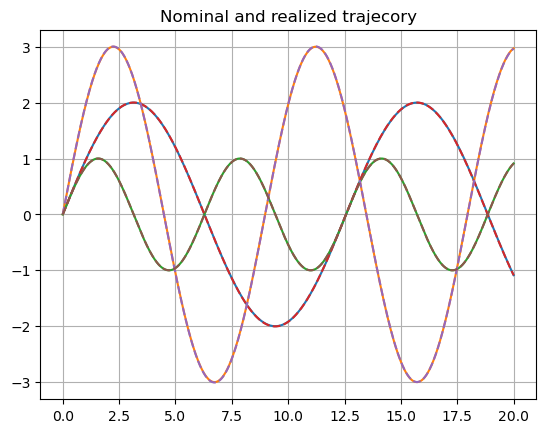

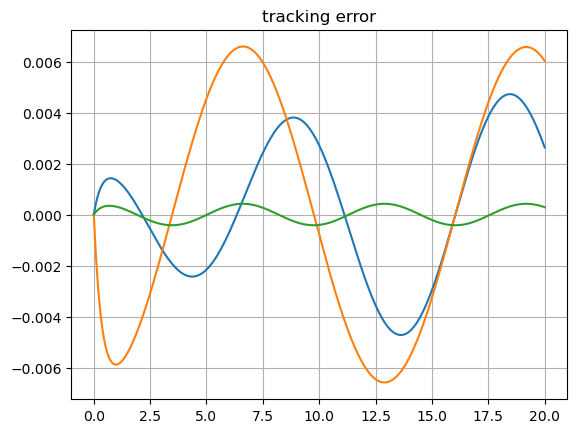

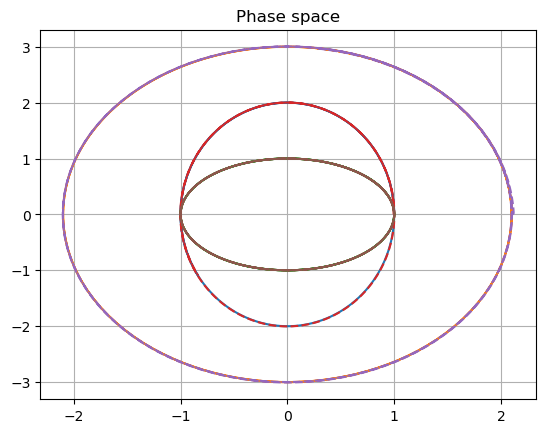

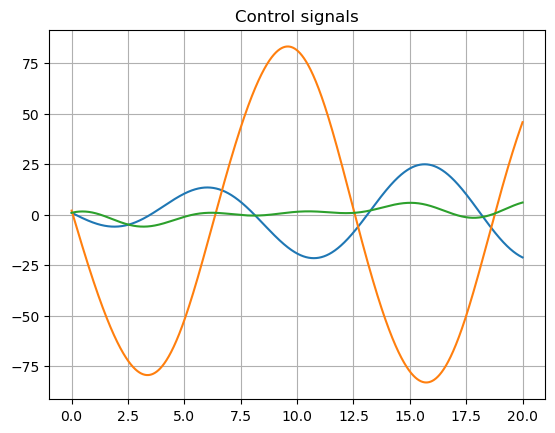

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001B66681DF10>

In [4]:
#Lorenz VSSM
#control parameters
Λ=3
K=500
w=2

#time parameteres
δt=1e-3
LONG=Int(2e4)
l=LONG-1

#System Model parameteres
σₑ=5
βₑ=8/3
ϱₑ=40

#inverse Model parameteres
σₐ=6.2
βₐ=7/3
ϱₐ=35

A1=2
ω1=0.5
A2=3
ω2=0.7
A3=1
ω3=1

#Arrays
x=zeros(LONG)
y=zeros(LONG)
z=zeros(LONG)

ẋ=zeros(LONG)
ẏ=zeros(LONG)
ż=zeros(LONG)

ẋᴰᵉˢ=zeros(LONG)
ẏᴰᵉˢ=zeros(LONG)
żᴰᵉˢ=zeros(LONG)

xᴺ=zeros(LONG)
yᴺ=zeros(LONG)
zᴺ=zeros(LONG)

ẋᴺ=zeros(LONG)
ẏᴺ=zeros(LONG)
żᴺ=zeros(LONG)


u_x=zeros(LONG)
u_y=zeros(LONG)
u_z=zeros(LONG)

S_x=zeros(LONG)
S_x_p=zeros(LONG)
S_y=zeros(LONG)
S_y_p=zeros(LONG)
S_z=zeros(LONG)
S_z_p=zeros(LONG)

t=zeros(LONG)
#initial conditions
x[1]=A1*sin(ω1*δt)
y[1]=A2*sin(ω2*δt)
z[1]=A3*sin(ω3*δt)

ẋ[1]=A1*ω1*cos(ω1*δt)
ẏ[1]=A2*ω2*cos(ω2*δt)
ż[1]=A3*ω3*cos(ω3*δt)


#simulation

e_int_x=0
e_int_y=0
e_int_z=0



#I think we need to set something like this

# e_det_x=0

# also do something 


for i=1:l
    global e_int_x,e_int_y,e_int_z
    #timne
    t[i]=i*δt
    #Nominal trajectory
    xᴺ[i]=A1*sin(ω1*t[i])
    yᴺ[i]=A2*sin(ω2*t[i])
    zᴺ[i]=A3*sin(ω3*t[i])

    ẋᴺ[i]=A1*ω1*cos(ω1*t[i])
    ẏᴺ[i]=A2*ω2*cos(ω2*t[i])
    żᴺ[i]=A3*ω3*cos(ω3*t[i])

    #error
    e_x=xᴺ[i]-x[i]
    e_y=yᴺ[i]-y[i]
    e_z=zᴺ[i]-z[i]


    #Error - Integral
    e_int_x=e_int_x+δt*e_x
    e_int_y=e_int_y+δt*e_y
    e_int_z=e_int_z+δt*e_z


    # Error - Derative 
    e_p_x=ẋᴺ[i]-ẋ[i]
    e_p_y=ẏᴺ[i]-ẏ[i]
    e_p_z=żᴺ[i]-ż[i]





    #Error metric
    S_x[i]=Λ*e_int_x+e_x
    S_x_p[i]=Λ*e_x+e_p_x

    S_y[i]=Λ*e_int_y+e_y
    S_y_p[i]=Λ*e_y+e_p_y

    S_z[i]=Λ*e_int_z+e_z
    S_z_p[i]=Λ*e_z+e_p_z



    #Kinematic Block
    ẋᴰᵉˢ[i]=Λ*e_x+ẋᴺ[i]+K*tanh(S_x[i]/w)
    ẏᴰᵉˢ[i]=Λ*e_y+ẏᴺ[i]+K*tanh(S_y[i]/w)
    żᴰᵉˢ[i]=Λ*e_z+żᴺ[i]+K*tanh(S_z[i]/w)

    #inverse model
    u_x[i]=ẋᴰᵉˢ[i]-σₐ*(y[i]-x[i])
    u_y[i]=ẏᴰᵉˢ[i]-x[i]*(ϱₐ-z[i])+y[i]
    u_z[i]=żᴰᵉˢ[i]-x[i]*y[i]+βₐ*z[i]

    #system model
    ẋ[i]=σₑ*(y[i]-x[i])+u_x[i]
    ẏ[i]=x[i]*(ϱₑ-z[i])-y[i]+u_y[i]
    ż[i]=x[i]*y[i]-βₑ*z[i]+u_z[i]

   
     # integrate back to x,y,z
    x[i+1]=x[i]+δt*ẋ[i]
    y[i+1]=y[i]+δt*ẏ[i]
    z[i+1]=z[i]+δt*ż[i]
    end

    using PyPlot
    figure(1)
    grid(true)
    title("Nominal and realized trajecory")
    plot(t[1:l],xᴺ[1:l])
    plot(t[1:l],yᴺ[1:l])
    plot(t[1:l],zᴺ[1:l])

    plot(t[1:l],x[1:l],"--")
    plot(t[1:l],y[1:l],"--")
    plot(t[1:l],z[1:l],"--")

    figure(2)
    title("tracking error")
    grid(true)
    plot(t[1:l],xᴺ[1:l]-x[1:l])
    plot(t[1:l],yᴺ[1:l]-y[1:l])
    plot(t[1:l],zᴺ[1:l]-z[1:l])

    figure(3)
    title("Phase space")
    grid(true)
    plot(ẋᴺ[1:l],xᴺ[1:l])
    plot(ẏᴺ[1:l],yᴺ[1:l])
    plot(żᴺ[1:l],zᴺ[1:l])

    plot(ẋ[1:l],x[1:l],"--")
    plot(ẏ[1:l],y[1:l],"--")
    plot(ż[1:l],z[1:l],"--")

    figure(4)
    title("Control signals")
    grid(true)
    plot(t[1:l],u_x[1:l])
    plot(t[1:l],u_y[1:l])
    plot(t[1:l],u_z[1:l])

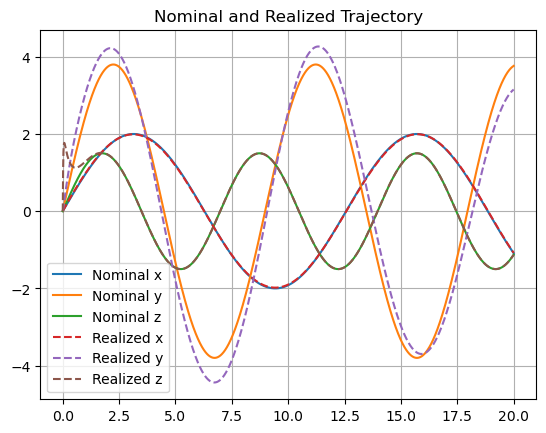

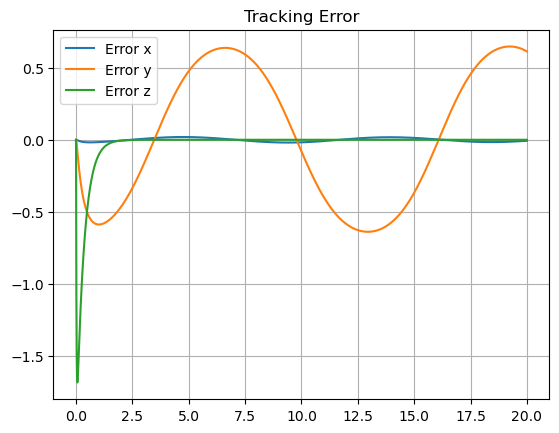

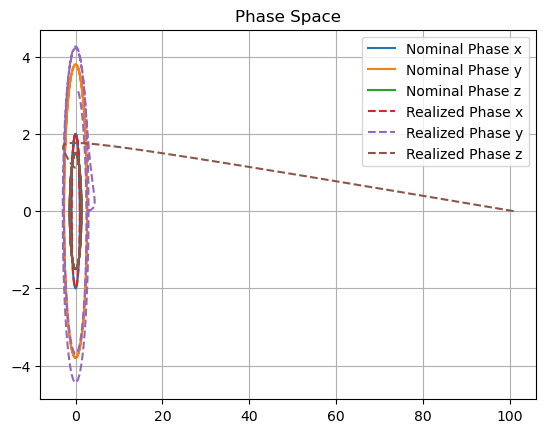

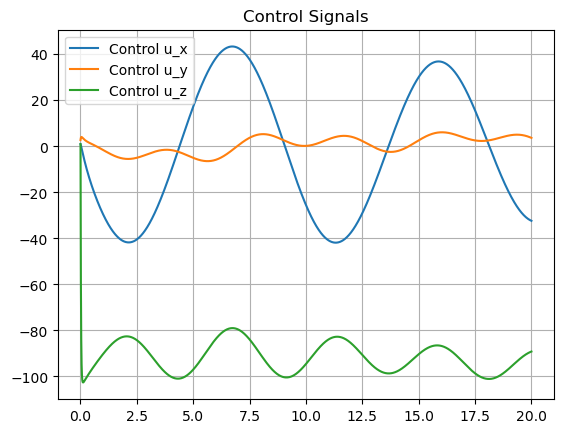

In [9]:
using PyPlot

# Define control parameters
Λ = 3
K = 500
w = 10

# Define time parameters
δt = 1e-3
LONG = Int(2e4)
l = LONG - 1

# Define system model parameters
σₑ = 10
ϱₑ = 100
βₑ = 0.3

# Define inverse model parameters
σₐ = 9
βₐ = 98
ϱₐ = 0.4

# Define nominal trajectory parameters
A1 = 2
ω1 = 0.5
A2 = 3.8
ω2 = 0.7
A3 = 1.5
ω3 = 0.9

# Initialize arrays for simulation
x = zeros(LONG)
y = zeros(LONG)
z = zeros(LONG)
ẋ = zeros(LONG)
ẏ = zeros(LONG)
ż = zeros(LONG)
ẋᴰᵉˢ = zeros(LONG)
ẏᴰᵉˢ = zeros(LONG)
żᴰᵉˢ = zeros(LONG)
xᴺ = zeros(LONG)
yᴺ = zeros(LONG)
zᴺ = zeros(LONG)
ẋᴺ = zeros(LONG)
ẏᴺ = zeros(LONG)
żᴺ = zeros(LONG)
u_x = zeros(LONG)
u_y = zeros(LONG)
u_z = zeros(LONG)
S_x = zeros(LONG)
S_x_p = zeros(LONG)
S_y = zeros(LONG)
S_y_p = zeros(LONG)
S_z = zeros(LONG)
S_z_p = zeros(LONG)
t = zeros(LONG)

# Initialize error integrals
e_int_x = 0
e_int_y = 0
e_int_z = 0


#initial conditions

x[1]=A1*sin(ω1*δt)
y[1]=A2*sin(ω2*δt)
z[1]=A3*sin(ω3*δt)

ẋ[1]=A1*ω1*cos(ω1*δt)
ẏ[1]=A2*ω2*cos(ω2*δt)
ż[1]=A3*ω3*cos(ω3*δt)



# Simulation loop with all initial conditions set to zero
for i = 1:l
    t[i] = i * δt  # Time update
    # Compute nominal trajectories
    xᴺ[i] = A1 * sin(ω1 * t[i])
    yᴺ[i] = A2 * sin(ω2 * t[i])
    zᴺ[i] = A3 * sin(ω3 * t[i])
    ẋᴺ[i] = A1 * ω1 * cos(ω1 * t[i])
    ẏᴺ[i] = A2 * ω2 * cos(ω2 * t[i])
    żᴺ[i] = A3 * ω3 * cos(ω3 * t[i])
    
    # Calculate errors
    e_x = xᴺ[i] - x[i]
    e_y = yᴺ[i] - y[i]
    e_z = zᴺ[i] - z[i]
    
    e_int_x += δt * e_x  # Integrate error
    e_int_y += δt * e_y
    e_int_z += δt * e_z
    
    # Sliding mode control computation
    S_x[i] = Λ * e_int_x + e_x
    S_y[i] = Λ * e_int_y + e_y
    S_z[i] = Λ * e_int_z + e_z
    
    # Derive control inputs from kinematic blocks
    ẋᴰᵉˢ[i] = Λ * e_x + ẋᴺ[i] + K * tanh(S_x[i] / w)
    ẏᴰᵉˢ[i] = Λ * e_y + ẏᴺ[i] + K * tanh(S_y[i] / w)
    żᴰᵉˢ[i] = Λ * e_z + żᴺ[i] + K * tanh(S_z[i] / w)
    
    # # Apply control using inverse model
    # u_x[i] = ẋᴰᵉˢ[i] - σₐ * (y[i] - x[i])
    # u_y[i] = ẏᴰᵉˢ[i] - x[i] * (ϱₐ - z[i]) + y[i]
    # u_z[i] = żᴰᵉˢ[i] - x[i] * y[i] + βₐ * z[i]
    
    # # Update system states using the system model
    # ẋ[i] = σₑ * (y[i] - x[i]) + u_x[i]
    # ẏ[i] = x[i] * (ϱₑ - z[i]) - y[i] + u_y[i]
    # ż[i] = x[i] * y[i] - βₑ * z[i] + u_z[i]



# Dynamics inverse model
    u_x[i] = ẋᴰᵉˢ[i] - σₐ * y[i]
    u_y[i] = ẏᴰᵉˢ[i] + βₐ * x[i] - y[i] * z[i]
    u_z[i] = żᴰᵉˢ[i] - ϱₐ + y[i]^2

 # Dynamics Update system states using the system model
   ẋ[i] = σₑ * y[i] + u_x[i]
   ẏ[i] = -βₑ * x[i] + y[i] * z[i] + u_y[i]
   ż[i] = ϱₑ - y[i]^2 + u_z[i]
    
    
    x[i+1] = x[i] + δt * ẋ[i]
    y[i+1] = y[i] + δt * ẏ[i]
    z[i+1] = z[i] + δt * ż[i]
end

# Plot the results: Nominal and Realized Trajectories, Tracking Errors, Phase Spaces, Control Signals
using PyPlot

# Plotting nominal and realized trajectories
figure(1)
grid(true)
title("Nominal and Realized Trajectory")
plot(t[1:l], xᴺ[1:l], label="Nominal x")
plot(t[1:l], yᴺ[1:l], label="Nominal y")
plot(t[1:l], zᴺ[1:l], label="Nominal z")
plot(t[1:l], x[1:l], "--", label="Realized x")
plot(t[1:l], y[1:l], "--", label="Realized y")
plot(t[1:l], z[1:l], "--", label="Realized z")
legend()

# Plotting tracking errors for x, y, z
figure(2)
grid(true)
title("Tracking Error")
plot(t[1:l], xᴺ[1:l] - x[1:l], label="Error x")
plot(t[1:l], yᴺ[1:l] - y[1:l], label="Error y")
plot(t[1:l], zᴺ[1:l] - z[1:l], label="Error z")
legend()

# Plotting phase space trajectories
figure(3)
grid(true)
title("Phase Space")
plot(ẋᴺ[1:l], xᴺ[1:l], label="Nominal Phase x")
plot(ẏᴺ[1:l], yᴺ[1:l], label="Nominal Phase y")
plot(żᴺ[1:l], zᴺ[1:l], label="Nominal Phase z")
plot(ẋ[1:l], x[1:l], "--", label="Realized Phase x")
plot(ẏ[1:l], y[1:l], "--", label="Realized Phase y")
plot(ż[1:l], z[1:l], "--", label="Realized Phase z")
legend()

# Plotting control signals
figure(4)
grid(true)
title("Control Signals")
plot(t[1:l], u_x[1:l], label="Control u_x")
plot(t[1:l], u_y[1:l], label="Control u_y")
plot(t[1:l], u_z[1:l], label="Control u_z")
legend()

show()



sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


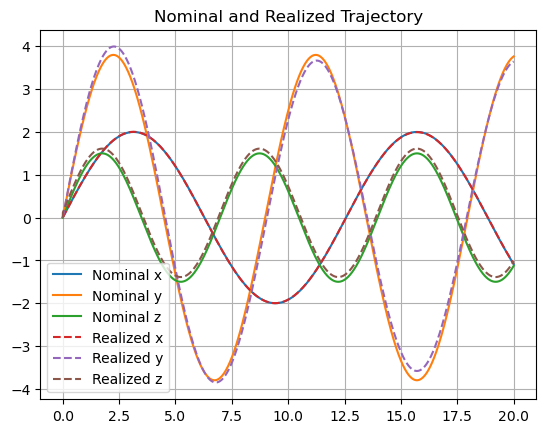

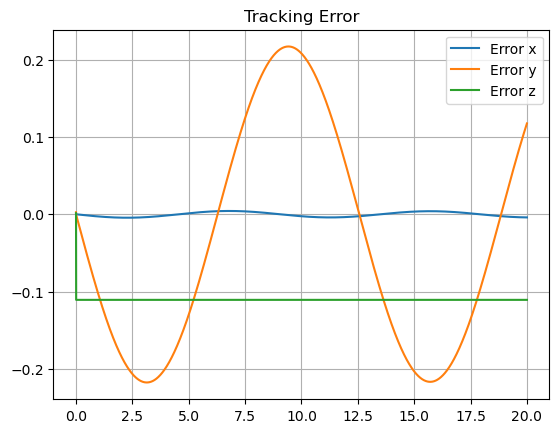

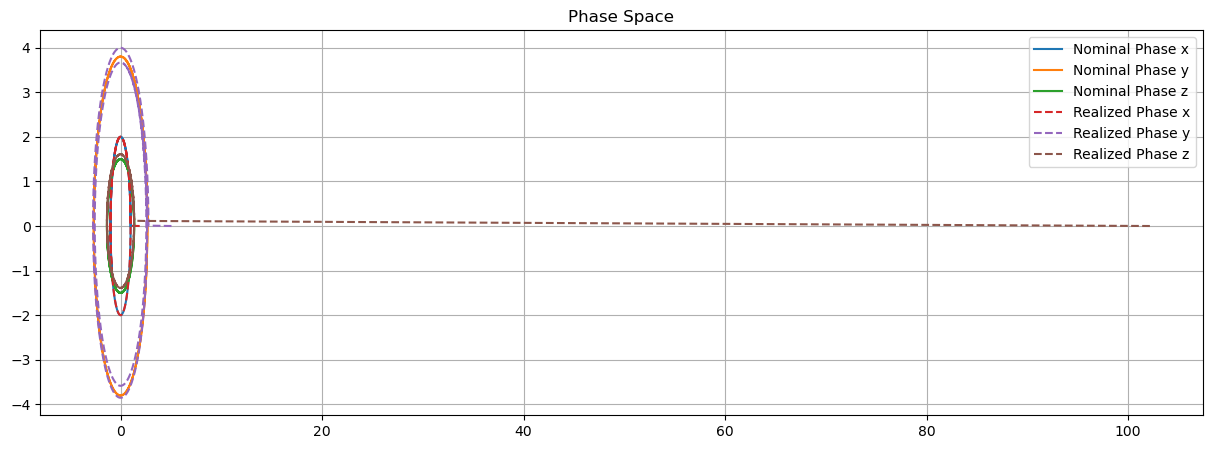

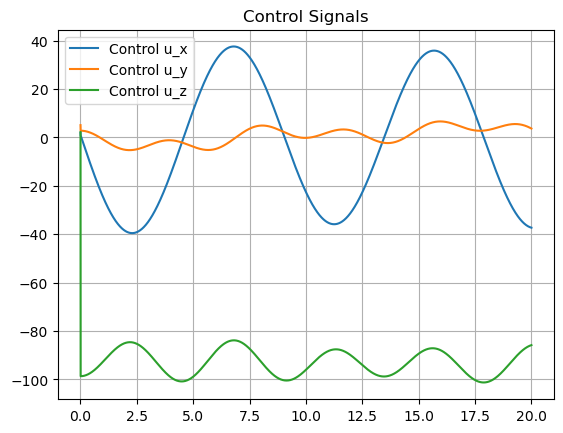

In [1]:
using PyPlot

# Define control parameters
Λ = 900 # Proportional gain (P)
K = 1/900 #Gain for the corrective action, similar to Derivative gain (D)
w = 1   # Boundary width for the tanh function, smoothing control actions

# Define time parameters
δt = 1e-3
LONG = Int(2e4)
l = LONG - 1

# System dynamics parameters
σₑ = 10
ϱₑ = 100
βₑ = 0.3

# Inverse dynamics parameters for control calculation
σₐ = 9
βₐ = 98
ϱₐ = 0.4

# Nominal trajectory parameters
A1 = 2
ω1 = 0.5
A2 = 3.8
ω2 = 0.7
A3 = 1.5
ω3 = 0.9

# Initialization of state and control arrays
x = zeros(LONG)
y = zeros(LONG)
z = zeros(LONG)

ẋ = zeros(LONG)
ẏ = zeros(LONG)
ż = zeros(LONG)

ẋᴰᵉˢ = zeros(LONG)
ẏᴰᵉˢ = zeros(LONG)
żᴰᵉˢ = zeros(LONG)

xᴺ = zeros(LONG)
yᴺ = zeros(LONG)
zᴺ = zeros(LONG)

ẋᴺ = zeros(LONG)
ẏᴺ = zeros(LONG)
żᴺ = zeros(LONG)

u_x = zeros(LONG)
u_y = zeros(LONG)
u_z = zeros(LONG)

S_x = zeros(LONG)
S_x_p = zeros(LONG)
S_y = zeros(LONG)
S_y_p = zeros(LONG)
S_z = zeros(LONG)
S_z_p = zeros(LONG)

t = zeros(LONG)

e_int_x = 0
e_int_y = 0
e_int_z = 0
e_prev_x = 0
e_prev_y = 0
e_prev_z = 0



# intial conditions
x[1]=0
y[1]=0
z[1]=0

ẋ[1]=0
ẏ[1]=0
ż[1]=0

# Simulation loop
for i = 1:l
    t[i] = i * δt  # Time update
    # Calculate nominal trajectories
    xᴺ[i] = A1 * sin(ω1 * t[i])
    yᴺ[i] = A2 * sin(ω2 * t[i])
    zᴺ[i] = A3 * sin(ω3 * t[i])
    ẋᴺ[i] = A1 * ω1 * cos(ω1 * t[i])
    ẏᴺ[i] = A2 * ω2 * cos(ω2 * t[i])
    żᴺ[i] = A3 * ω3 * cos(ω3 * t[i])
    
    # Calculate current errors
    e_x = xᴺ[i] - x[i]
    e_y = yᴺ[i] - y[i]
    e_z = zᴺ[i] - z[i]
    
    # Integrate error for the Integral component
    e_int_x += δt * e_x
    e_int_y += δt * e_y
    e_int_z += δt * e_z
    
    # Derivative of error for the Derivative component
    e_dot_x = (e_x - e_prev_x) / δt
    e_dot_y = (e_y - e_prev_y) / δt
    e_dot_z = (e_z - e_prev_z) / δt
    e_prev_x = e_x
    e_prev_y = e_y
    e_prev_z = e_z

    # Sliding mode control computation with PID error metrics
    S_x[i] =  e_x + Λ * e_int_x + K * e_dot_x  # Adding PID components
    S_y[i] =  e_y + Λ * e_int_y + K * e_dot_y
    S_z[i] =  e_z + Λ * e_int_z + K * e_dot_z

    
    
    # Compute control inputs using sliding mode dynamics
    ẋᴰᵉˢ[i] = Λ * e_x + ẋᴺ[i] + K * tanh(S_x[i] / w)
    ẏᴰᵉˢ[i] = Λ * e_y + ẏᴺ[i] + K * tanh(S_y[i] / w)
    żᴰᵉˢ[i] = Λ * e_z + żᴺ[i] + K * tanh(S_z[i] / w)

   # Dynamics inverse model
    u_x[i] = ẋᴰᵉˢ[i] - σₐ * y[i]
    u_y[i] = ẏᴰᵉˢ[i] + βₐ * x[i] - y[i] * z[i]
    u_z[i] = żᴰᵉˢ[i] - ϱₐ + y[i]^2

 # Dynamics Update system states using the system model
    ẋ[i] = σₑ * y[i] + u_x[i]
    ẏ[i] = -βₑ * x[i] + y[i] * z[i] + u_y[i]
    ż[i] = ϱₑ - y[i]^2 + u_z[i]
    
    x[i+1] = x[i] + δt * ẋ[i]
    y[i+1] = y[i] + δt * ẏ[i]
    z[i+1] = z[i] + δt * ż[i]
end

# Plot the results: Nominal and Realized Trajectories, Tracking Errors, Phase Spaces, Control Signals
using PyPlot

# Plotting nominal and realized trajectories
figure(1)
grid(true)
title("Nominal and Realized Trajectory")
plot(t[1:l], xᴺ[1:l], label="Nominal x")
plot(t[1:l], yᴺ[1:l], label="Nominal y")
plot(t[1:l], zᴺ[1:l], label="Nominal z")
plot(t[1:l], x[1:l], "--", label="Realized x")
plot(t[1:l], y[1:l], "--", label="Realized y")
plot(t[1:l], z[1:l], "--", label="Realized z")
legend()
savefig("Nominal and Realized Trajectory.pdf")

# Plotting tracking errors for x, y, z
figure(2)
grid(true)
title("Tracking Error")
plot(t[1:l], xᴺ[1:l] - x[1:l], label="Error x")
plot(t[1:l], yᴺ[1:l] - y[1:l], label="Error y")
plot(t[1:l], zᴺ[1:l] - z[1:l], label="Error z")
legend()
savefig("Tracking Error.pdf")

# Plotting phase space trajectories
figure(3,figsize=(15, 5))
grid(true)
title("Phase Space")
plot(ẋᴺ[1:l], xᴺ[1:l], label="Nominal Phase x")
plot(ẏᴺ[1:l], yᴺ[1:l], label="Nominal Phase y")
plot(żᴺ[1:l], zᴺ[1:l], label="Nominal Phase z")
plot(ẋ[1:l], x[1:l], "--", label="Realized Phase x")
plot(ẏ[1:l], y[1:l], "--", label="Realized Phase y")
plot(ż[1:l], z[1:l], "--", label="Realized Phase z")
legend()
savefig("Phase Space.pdf")

# Plotting control signals
figure(4)
grid(true)
title("Control Signals")
plot(t[1:l], u_x[1:l], label="Control u_x")
plot(t[1:l], u_y[1:l], label="Control u_y")
plot(t[1:l], u_z[1:l], label="Control u_z")
legend()
savefig("Control Signals.pdf" ) # add this into update it later to latex

show()
